<a href="https://colab.research.google.com/github/akash-agni/DeepLearning/blob/main/Copy_of_Autoencoder_For_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10
import torch
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(f"Training Data Images : {len(x_train)}")
print(f"Testing Data Images : {len(x_test)}")

Training Data Images : 50000
Testing Data Images : 10000


In [3]:
label_names = {0: 'airplane',
               1: 'automobile',
               2: 'bird',
               3: 'cat',
               4: 'deer',
               5: 'dog',
               6: 'frog',
               7: 'horse',
               8: 'ship',
               9: 'truck'}

In [4]:
x_train = x_train[(y_train == 2)[:,0],:,:,:]
x_test = x_test[(y_test == 2)[:,0],:,:,:]

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

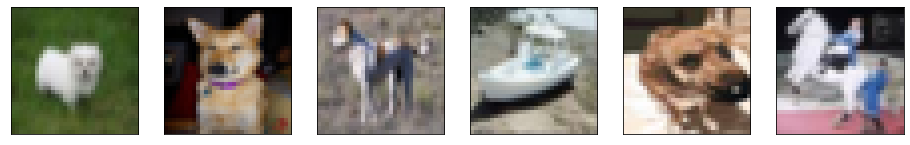

In [5]:
fig, ax = plt.subplots(figsize=(16,3), ncols=6)
for i in range(6):
  idx = np.random.randint(len(x_train))
  img = x_train[idx,:,:,:]
  ax[i].imshow(img)
  ax[i].get_xaxis().set_visible(False)
  ax[i].get_yaxis().set_visible(False)

In [6]:
class AutoEncoder(torch.nn.Module):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = torch.nn.Sequential(
        torch.nn.Conv2d(3, 64, 3, 2, padding=1),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        torch.nn.Conv2d(64, 64, 3, 1, padding=1),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        torch.nn.Conv2d(64, 128, 3, 2, padding=1),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        torch.nn.Conv2d(128, 128, 3, 1, padding=1),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU()

    )

    self.decoder = torch.nn.Sequential(
        torch.nn.ConvTranspose2d(128, 128, 3, 1, padding=1),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        torch.nn.ConvTranspose2d(128, 128, 3, 2, padding=1, output_padding=1),
        torch.nn.BatchNorm2d(128),
        torch.nn.ReLU(),
        torch.nn.ConvTranspose2d(128, 64, 3, 1, padding=1),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        torch.nn.ConvTranspose2d(64, 64, 3, 2, padding=1, output_padding=1),
        torch.nn.BatchNorm2d(64),
        torch.nn.ReLU(),
        torch.nn.Conv2d(64, 3, 3, 1, padding=1),
        torch.nn.BatchNorm2d(3),
        torch.nn.Sigmoid()
    )

  def __call__(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [7]:
def train(dataloader, model, loss_fn, optimizer, device):
  size = len(dataloader)
  batch = 0
  for X in dataloader:
    X = X.float().to(device)

    pred = model(X)
    loss = loss_fn(pred, X)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % int(size/10) == 0:
      print(f"loss: {loss.item():>7f}  [{batch:>2d}/{size:>2d}]")
    batch += 1

In [8]:
dataloader = torch.utils.data.DataLoader(np.moveaxis(x_train, -1, 1), shuffle=True, batch_size=64)
device = 'cuda'
model = AutoEncoder().to(device)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adagrad(model.parameters(),lr=0.1)
num_epochs = 10
print(model)

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTr

In [9]:
for epoch in range(num_epochs):
  print(f"{epoch}/{num_epochs}")
  train(dataloader, model, loss_fn, optimizer, device)

0/10
loss: 0.112058  [ 0/782]
loss: 0.012596  [78/782]
loss: 0.010199  [156/782]
loss: 0.008241  [234/782]
loss: 0.006399  [312/782]
loss: 0.006284  [390/782]
loss: 0.005032  [468/782]
loss: 0.005263  [546/782]
loss: 0.004417  [624/782]
loss: 0.004332  [702/782]
loss: 0.004000  [780/782]
1/10
loss: 0.004858  [ 0/782]
loss: 0.004167  [78/782]
loss: 0.003429  [156/782]
loss: 0.003661  [234/782]
loss: 0.003345  [312/782]
loss: 0.003416  [390/782]
loss: 0.003307  [468/782]
loss: 0.002862  [546/782]
loss: 0.003197  [624/782]
loss: 0.003005  [702/782]
loss: 0.002756  [780/782]
2/10
loss: 0.003485  [ 0/782]
loss: 0.003032  [78/782]
loss: 0.002983  [156/782]
loss: 0.004207  [234/782]
loss: 0.002851  [312/782]
loss: 0.002856  [390/782]
loss: 0.002815  [468/782]
loss: 0.002469  [546/782]
loss: 0.002579  [624/782]
loss: 0.002570  [702/782]
loss: 0.002075  [780/782]
3/10
loss: 0.002711  [ 0/782]
loss: 0.002142  [78/782]
loss: 0.002652  [156/782]
loss: 0.002931  [234/782]
loss: 0.003053  [312/782]


In [10]:
with torch.no_grad():
  predictions = model(torch.tensor(np.moveaxis(x_test, -1, 1), dtype=torch.float32).to(device))

In [11]:
predictions = predictions.to('cpu').detach().numpy()

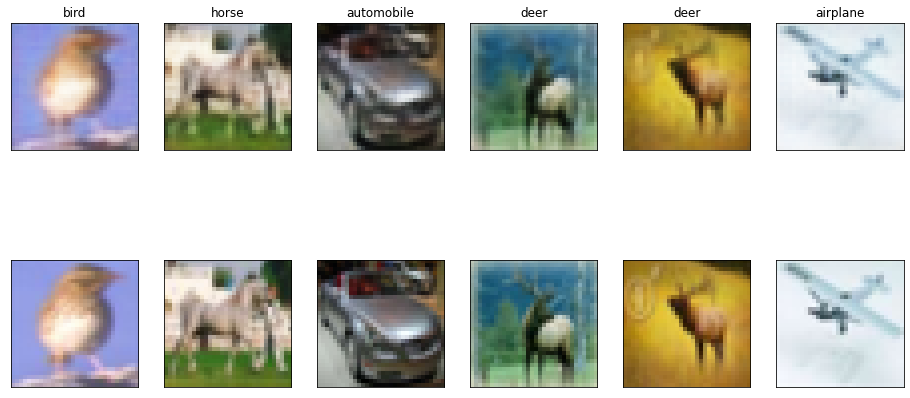

In [12]:
fig, ax = plt.subplots(figsize=(16,8), nrows=2,ncols=6)
for i in range(6):
  idx = np.random.randint(len(predictions))
  pred_img = predictions[idx,:,:,:]
  pred_img = np.moveaxis(pred_img, 0, -1)
  label = y_test[idx][0]
  ax[0][i].imshow(pred_img)
  ax[0][i].set_title(label_names[label])
  ax[0][i].get_xaxis().set_visible(False)
  ax[0][i].get_yaxis().set_visible(False)

  orig_img = x_test[idx,:,:,:]
  ax[1][i].imshow(orig_img)
  ax[1][i].get_xaxis().set_visible(False)
  ax[1][i].get_yaxis().set_visible(False)

In [91]:
noise = np.reshape(np.array([1 if np.random.randint(100) > 20 else 0 for i in range(32*32*3)]), (32,32,3))
idx = np.random.randint(len(x_test))
img = x_test[idx]
img_n = img * noise
img_c = model(torch.tensor(np.moveaxis(img_n[np.newaxis,:,:,:], -1, 1)).float().to(device))

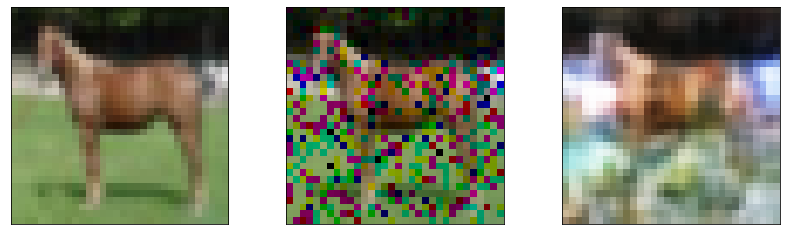

In [92]:
fig, ax = plt.subplots(figsize=(14, 4), ncols=3)
orig = img
ax[0].imshow(orig)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

ns = img_n
ax[1].imshow(ns)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

pred = img_c[0].detach().to('cpu').numpy()
pred = np.moveaxis(pred, 0, -1)
ax[2].imshow(pred)
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)

In [76]:
pred.shape

(3,)